In [1]:
# 코드 8-1 라이브러리 호출 및 데이터셋 내려받기
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()  # 사이킷런을 이용하여 붓꽃 데이터셋 사용

2024-12-03 01:52:32.148182: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 01:52:32.150252: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 01:52:32.156044: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733158352.165616  109386 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733158352.168303  109386 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 01:52:32.178754: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# 코드 8-2 데이터프레임에 데이터셋 저장
df = pd.DataFrame(
    iris.data, columns=iris.feature_names
)  # 붓꽃 데이터셋을 df(dataframe)에 저장
df = df.astype(float)
df["label"] = iris.target  # 붓꽃 데이터셋의 정답에 ‘label’이라는 이름을 붙임
df["label"] = df.label.replace(dict(enumerate(iris.target_names)))

In [3]:
# 코드 8-3 원-핫 인코딩 적용
label = pd.get_dummies(df["label"], prefix="label")
df = pd.concat([df, label], axis=1)
df.drop(["label"], axis=1, inplace=True)

In [4]:
# 코드 8-4 데이터셋 분류
X = df[
    ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
]
# ‘sepal length (cm)’, ‘sepal width (cm)’, ‘petal length (cm)’, ‘petal width (cm)’ 열을 배열로 변환하여 X 변수에 저장
X = np.asarray(X)
y = df[["label_setosa", "label_versicolor", "label_virginica"]]
# ‘label_setosa’, ‘label_versicolor’, ‘label_virginica’ 열을 배열로 변환하여 y 변수에 저장
y = np.asarray(y)

In [5]:
# 코드 8-5 데이터셋 분리
# 훈련과 검증 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:
# 코드 8-6 배치 정규화가 적용되지 않은 모델 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

model1 = Sequential(
    [
        Dense(
            64, input_shape=(4,), activation="relu"
        ),  # 입력층은 (4,0)의 형태를 가지며, 유닛 64개로 구성
        Dense(
            128, activation="relu"
        ),  # 입력층 다음으로 유닛 128개를 갖는 밀집층을 두 개 구성
        Dense(128, activation="relu"),
        Dense(
            64, activation="relu"
        ),  # 유닛 64개로 구성된 밀집층이 두 개 더 있으며, 렐루(ReLU) 활성화 함수 사용
        Dense(64, activation="relu"),
        Dense(
            3, activation="softmax"
        ),  # 출력층은 유닛 세 개로 구성되며, 소프트맥스를 활성화 함수로 사용
    ]
)
model1.summary()

/home/halozhan/Study/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1733158363.439190  109386 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,763 (147.51 KB)

 Trainable params: 37,763 (147.51 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 코드 8-7 모델 훈련
model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history1 = model1.fit(
    X_train, y_train, epochs=1000, validation_split=0.25, batch_size=40, verbose=2
)

Epoch 1/1000
3/3 - 1s - 320ms/step - accuracy: 0.1778 - loss: 1.0934 - val_accuracy: 0.5333 - val_loss: 1.0063
Epoch 2/1000
3/3 - 0s - 17ms/step - accuracy: 0.7000 - loss: 0.9822 - val_accuracy: 0.5667 - val_loss: 0.9501
Epoch 3/1000
3/3 - 0s - 16ms/step - accuracy: 0.7222 - loss: 0.9003 - val_accuracy: 0.5667 - val_loss: 0.8855
Epoch 4/1000
3/3 - 0s - 17ms/step - accuracy: 0.7222 - loss: 0.8160 - val_accuracy: 0.5667 - val_loss: 0.8188
Epoch 5/1000
3/3 - 0s - 17ms/step - accuracy: 0.7222 - loss: 0.7334 - val_accuracy: 0.5667 - val_loss: 0.7255
Epoch 6/1000
3/3 - 0s - 17ms/step - accuracy: 0.7222 - loss: 0.6397 - val_accuracy: 0.6333 - val_loss: 0.6492
Epoch 7/1000
3/3 - 0s - 16ms/step - accuracy: 0.7222 - loss: 0.5447 - val_accuracy: 0.6333 - val_loss: 0.5886
Epoch 8/1000
3/3 - 0s - 16ms/step - accuracy: 0.7222 - loss: 0.4573 - val_accuracy: 0.6333 - val_loss: 0.5604
Epoch 9/1000
3/3 - 0s - 17ms/step - accuracy: 0.7667 - loss: 0.4018 - val_accuracy: 0.8333 - val_loss: 0.4804
Epoch 10/

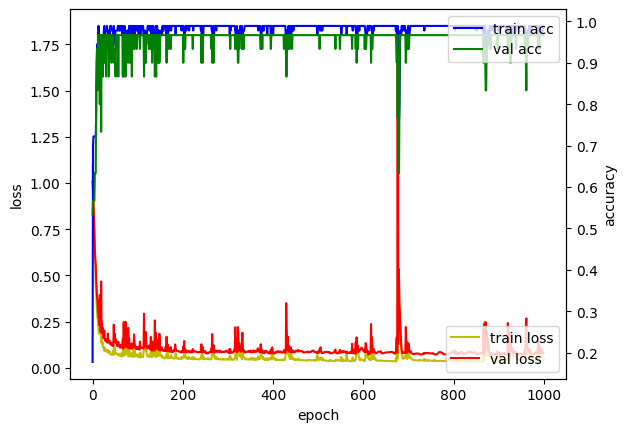

In [8]:
# 코드 8-8 훈련 결과 시각화
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()  # subplots는 한 번에 여러 그래프를 보여 주는 데 사용
acc_ax = loss_ax.twinx()  # twinx()를 사용하여 y축이 두 개 있는 플롯을 구성
loss_ax.plot(history1.history["loss"], "y", label="train loss")
loss_ax.plot(
    history1.history["val_loss"], "r", label="val loss"
)  # plot()은 선 (line) 또는 마커 (marker) 그래프 그리기에 사용되는 함수
acc_ax.plot(history1.history["accuracy"], "b", label="train acc")
acc_ax.plot(history1.history["val_accuracy"], "g", label="val acc")

loss_ax.set_xlabel("epoch")  # x축 라벨
loss_ax.set_ylabel("loss")  # y축 라벨
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="lower right")
acc_ax.legend(loc="upper right")
plt.show()

In [9]:
# 코드 8-9 정확도와 손실 정보 표현
loss_and_metrics = model1.evaluate(X_test, y_test)
print("## 손실과 정확도 평가 ##")
print(loss_and_metrics)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9333 - loss: 0.0787
## 손실과 정확도 평가 ##
[0.0787263885140419, 0.9333333373069763]


In [10]:
# 코드 8-10 배치 정규화가 적용된 모델

from tensorflow.keras.initializers import RandomNormal, Constant

model2 = Sequential(
    [
        Dense(64, input_shape=(4,), activation="relu"),
        BatchNormalization(),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dense(64, activation="relu"),
        BatchNormalization(),
        Dense(64, activation="relu"),
        BatchNormalization(
            momentum=0.95,
            epsilon=0.005,
            beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
            gamma_initializer=Constant(value=0.9),
        ),
        Dense(3, activation="softmax"),
    ]
)
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,555 (154.51 KB)

 Trainable params: 38,659 (151.01 KB)

 Non-trainable params: 896 (3.50 KB)

In [11]:
# 코드 8-11 모델 훈련
model2.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

history2 = model2.fit(
    X_train,
    y_train,
    epochs=1000,
    validation_split=0.25,
    batch_size=40,
    verbose=2,
)

Epoch 1/1000
3/3 - 2s - 549ms/step - accuracy: 0.3222 - loss: 1.6359 - val_accuracy: 0.4000 - val_loss: 1.0334
Epoch 2/1000
3/3 - 0s - 19ms/step - accuracy: 0.9000 - loss: 0.3624 - val_accuracy: 0.4000 - val_loss: 1.0386
Epoch 3/1000
3/3 - 0s - 20ms/step - accuracy: 0.9667 - loss: 0.1808 - val_accuracy: 0.4667 - val_loss: 1.0374
Epoch 4/1000
3/3 - 0s - 19ms/step - accuracy: 0.9667 - loss: 0.1236 - val_accuracy: 0.5667 - val_loss: 1.0418
Epoch 5/1000
3/3 - 0s - 19ms/step - accuracy: 0.9667 - loss: 0.1163 - val_accuracy: 0.5667 - val_loss: 1.0499
Epoch 6/1000
3/3 - 0s - 20ms/step - accuracy: 0.9778 - loss: 0.0820 - val_accuracy: 0.5333 - val_loss: 1.0672
Epoch 7/1000
3/3 - 0s - 20ms/step - accuracy: 0.9889 - loss: 0.0802 - val_accuracy: 0.4333 - val_loss: 1.0838
Epoch 8/1000
3/3 - 0s - 20ms/step - accuracy: 0.9778 - loss: 0.0752 - val_accuracy: 0.4333 - val_loss: 1.0925
Epoch 9/1000
3/3 - 0s - 21ms/step - accuracy: 0.9444 - loss: 0.1040 - val_accuracy: 0.3000 - val_loss: 1.0972
Epoch 10/

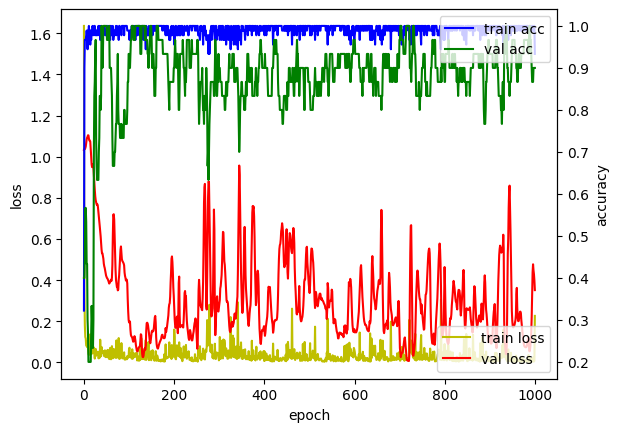

In [12]:
# 코드 8-12 훈련 결과 시각화
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history2.history["loss"], "y", label="train loss")
loss_ax.plot(history2.history["val_loss"], "r", label="val loss")

acc_ax.plot(history2.history["accuracy"], "b", label="train acc")
acc_ax.plot(history2.history["val_accuracy"], "g", label="val acc")

loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="lower right")
acc_ax.legend(loc="upper right")

plt.show()

In [13]:
# 코드 8-13 모델 평가
loss_and_metrics = model2.evaluate(X_test, y_test)
print("## 손실과 정확도 평가 ##")
print(loss_and_metrics)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9000 - loss: 0.2818
## 손실과 정확도 평가 ##
[0.28175637125968933, 0.8999999761581421]
